In [2]:
import sys
sys.path.append("..")
from blog_tools import data, embed
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import phate
import scprep
import warnings
import ipywidgets as widgets
import pandas as pd
font = {'size'   : 16}
mpl.rc('font', **font)

from sklearn.decomposition import PCA

algorithms = embed.__all__

In [4]:
data = pd.read_pickle('data/EmbryoidBody_counts.pkl')

In [8]:
embeddings = {}
for alg in algorithms:
    embeddings[alg.__name__] = alg(data)

In [90]:
data_pca = PCA(100).fit_transform(data)

In [ ]:
embeddings_pca = {}
for alg in algorithms:
    embeddings_pca[alg.__name__] = alg(data_pca)

In [9]:
samples = np.array([idx.split('#')[1] for idx in data.index])

In [10]:
import pickle

In [ ]:
with open('data/EmbryoidBody.embedding.pca.pkl', 'wb+') as f:
    pickle.dump(embeddings_pca, f)

In [13]:
with open('data/EmbryoidBody.embedding.pkl', 'rb') as f:
    embeddings = pickle.load(f)

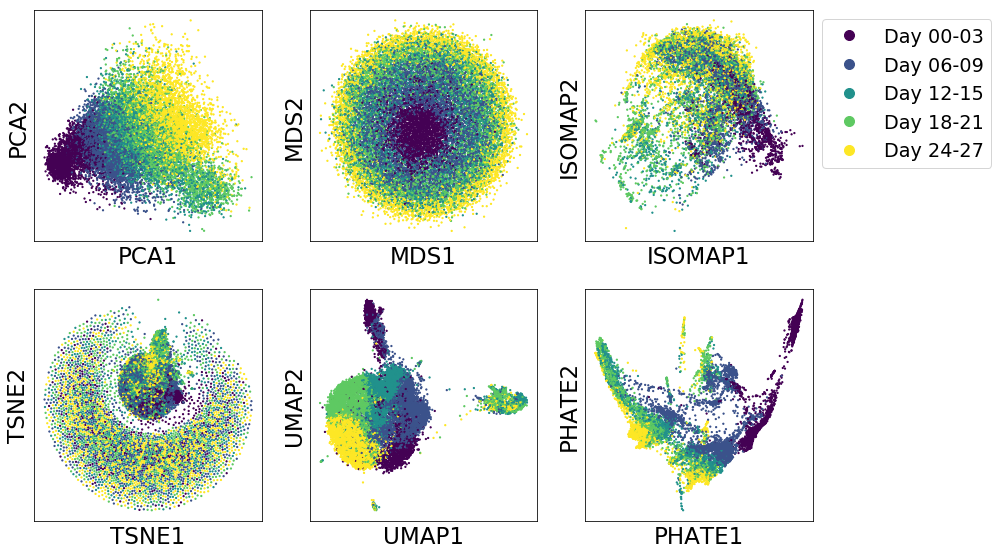

In [69]:
fig, axes = plt.subplots(2,3, figsize=(14.15,8))
axes = axes.flatten()
for alg, ax in zip(embeddings, axes):
    if alg == 'ISOMAP':
        scprep.plot.tools.generate_legend(cmap=cmap, ax=ax, bbox_to_anchor=(1,1))
    scprep.plot.scatter2d(embeddings[alg], c=samples.astype(int), cmap='viridis',
                         ticks=False, label_prefix=alg, legend=False,
                          ax=ax)
fig.tight_layout()
fig.savefig('./img/EmbryoidBody.comparison.png', dpi=300)

In [64]:
labels = ["Day 00-03", "Day 06-09", "Day 12-15", "Day 18-21", "Day 24-27"]

cmap = {label:plt.cm.viridis(np.array([0,1,2,3,4])/4)[i] for i, label in enumerate(labels)}

In [24]:
full_marker_genes = ['ARID3A (ENSG00000116017)', 'ASCL2 (ENSG00000183734)',  'CD34 (ENSG00000174059)',
 'CDX2 (ENSG00000165556)', 'CER1 (ENSG00000147869)', 'DLX1 (ENSG00000144355)',
 'DMRT3 (ENSG00000064218)', 'EN2 (ENSG00000164778)', 'EOMES (ENSG00000163508)',
 'FOXA2 (ENSG00000125798)', 'FOXD3-AS1 (ENSG00000230798)', 'GATA3-AS1 (ENSG00000197308)',
 'GATA4 (ENSG00000136574)', 'GATA5 (ENSG00000130700)', 'GATA6-AS1 (ENSG00000266010)',
 'GBX2 (ENSG00000168505)', 'GLI3 (ENSG00000106571)', 'HOXA2 (ENSG00000105996)',
 'HOXB1 (ENSG00000120094)', 'HOXB4 (ENSG00000182742)', 'HOXD13 (ENSG00000128714)',
 'HOXD9 (ENSG00000128709)', 'ISL1 (ENSG00000016082)', 'KLF5 (ENSG00000102554)',
 'KLF7 (ENSG00000118263)', 'LEF1 (ENSG00000138795)', 'LHX2 (ENSG00000106689)',
 'LHX5 (ENSG00000089116)', 'LMX1A (ENSG00000162761)', 'MAP2 (ENSG00000078018)',
 'MIXL1 (ENSG00000185155)', 'MYCBP (ENSG00000214114)', 'NANOG (ENSG00000111704)',
 'NES (ENSG00000132688)', 'NKX2-1 (ENSG00000136352)', 'NKX2-5 (ENSG00000183072)',
 'NKX2-8 (ENSG00000136327)', 'NPAS1 (ENSG00000130751)', 'NR2F1-AS1 (ENSG00000237187)',
 'OLIG1 (ENSG00000184221)', 'OLIG3 (ENSG00000177468)', 'ONECUT1 (ENSG00000169856)',
 'ONECUT2 (ENSG00000119547)', 'OTX2 (ENSG00000165588)', 'PAX3 (ENSG00000135903)',
 'PAX6 (ENSG00000007372)', 'PDGFRA (ENSG00000134853)', 'PECAM1 (ENSG00000261371)',
 'POU5F1 (ENSG00000204531)', 'SATB1 (ENSG00000182568)', 'SIX2 (ENSG00000170577)',
 'SIX3-AS1 (ENSG00000236502)', 'SIX6 (ENSG00000184302)', 'SOX13 (ENSG00000143842)',
 'SOX10 (ENSG00000100146)', 'SOX15 (ENSG00000129194)', 'SOX17 (ENSG00000164736)',
 'SOX9 (ENSG00000125398)', 'TTLL10 (ENSG00000162571)', 'TAL1 (ENSG00000162367)',
 'TBX15 (ENSG00000092607)', 'TBX18 (ENSG00000112837)', 'TBX5 (ENSG00000089225)',
 'TNNT2 (ENSG00000118194)', 'WT1 (ENSG00000184937)', 'ZBTB16 (ENSG00000109906)',
 'ZIC2 (ENSG00000043355)', 'ZIC5 (ENSG00000139800)', 'ACTB (ENSG00000075624)',
 'HAND1 (ENSG00000113196)']

In [34]:
full_marker_gene_symbols = np.array([g.split(' ')[0] for g in full_marker_genes])

In [71]:
full_marker_gene_symbols.shape

(70,)

In [31]:
import magic

In [32]:
data_magic = magic.MAGIC().fit_transform(data)

Calculating MAGIC...
  Running MAGIC on 16820 cells and 17445 genes.
  Calculating graph and diffusion operator...
    Calculating PCA...
    Calculated PCA in 19.18 seconds.
    Calculating KNN search...
    Calculated KNN search in 33.29 seconds.
    Calculating affinities...
    Calculated affinities in 14.69 seconds.
  Calculated graph and diffusion operator in 68.46 seconds.
  Calculating imputation...
    Automatically selected t = 10
  Calculated imputation in 5.09 seconds.
Calculated MAGIC in 85.57 seconds.


In [76]:
scprep.select.select_cols(data_magic, starts_with='NKX')

,NKX3-2,NKX6-1,NKX2-5,NKX3-1,NKX2-3,NKX1-2,NKX2-1,NKX2-8,NKX2-2
AAACATTGAAGTGA-1#1,0.000048,0.005573,0.005930,9.517751e-04,0.000376,0.035541,0.000121,0.002589,0.001465
AAACGCACCGGTAT-1#1,0.000223,0.001675,0.005977,1.496070e-03,-0.000709,0.028259,0.000677,0.002155,0.002256
AAACGCACCTATTC-1#1,-0.000205,0.000797,0.004251,1.168365e-03,-0.000550,0.033961,0.000448,0.001218,0.001647
AAACTTGAACCACA-1#1,0.000418,0.009018,0.005339,4.791957e-04,0.000710,0.019528,0.001544,0.009341,0.003274
AAAGATCTCTGCTC-1#1,0.000471,0.007242,0.005597,5.086391e-04,0.000512,0.016868,0.001649,0.008459,0.002928
AAAGATCTGGTACT-1#1,0.000270,0.001765,0.006227,1.521438e-03,-0.000763,0.027706,0.000634,0.001837,0.002174
AAAGATCTTGGTTG-1#1,0.000453,0.006964,0.006825,3.962664e-04,0.000998,0.028401,0.000451,0.004263,0.000632
AAAGGCCTAACCGT-1#1,-0.000378,0.007206,0.005291,7.512457e-04,0.000678,0.045325,-0.000422,0.001643,0.001170
AAAGTTTGCCAAGT-1#1,0.000056,0.000676,0.004946,1.296997e-03,-0.000524,0.029713,0.000641,0.001922,0.001899
AAAGTTTGCCCTCA-1#1,0.000293,0.005216,0.006453,6.188029e-04,0.000763,0.027290,0.000549,0.003491,0.000258


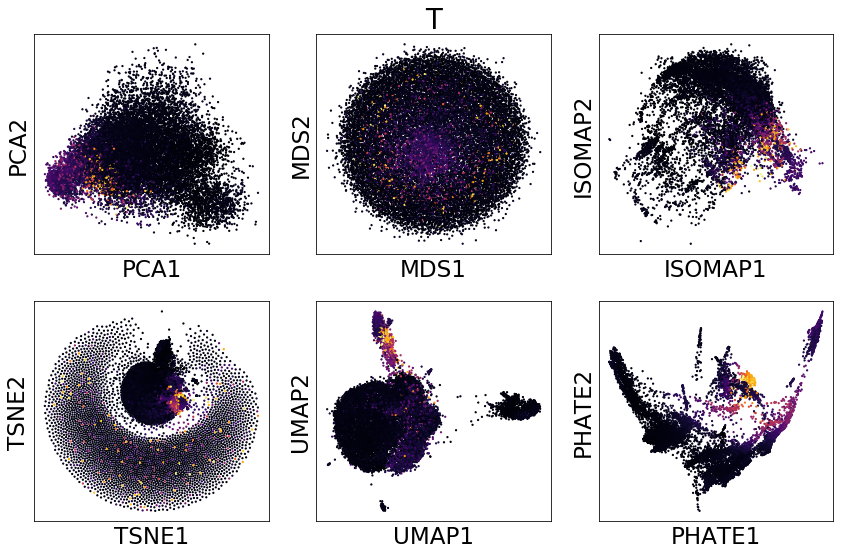

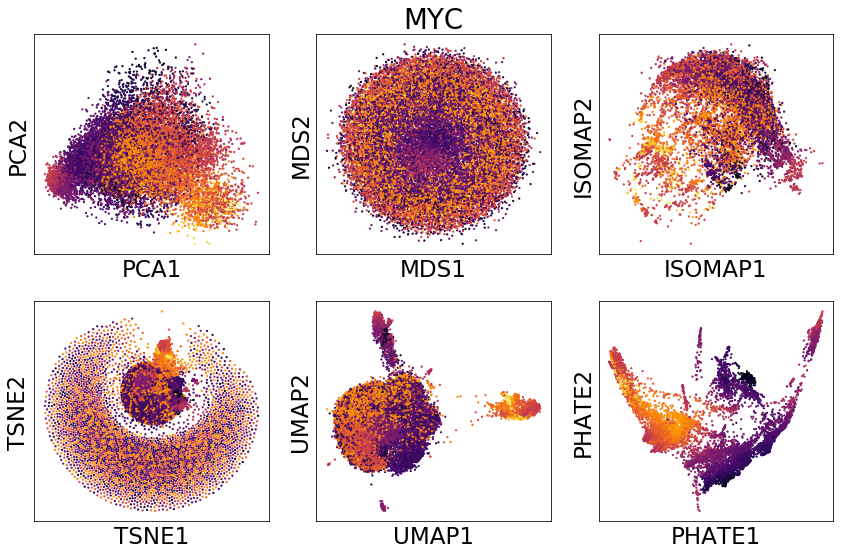

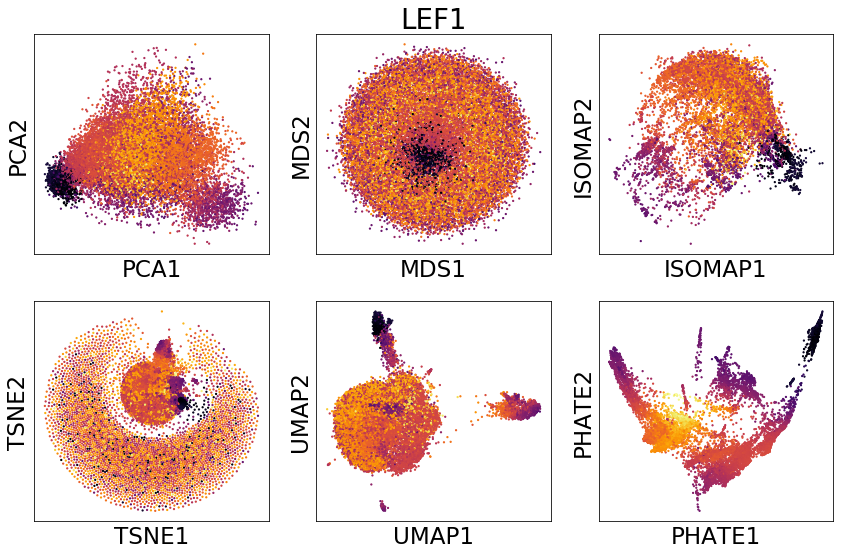

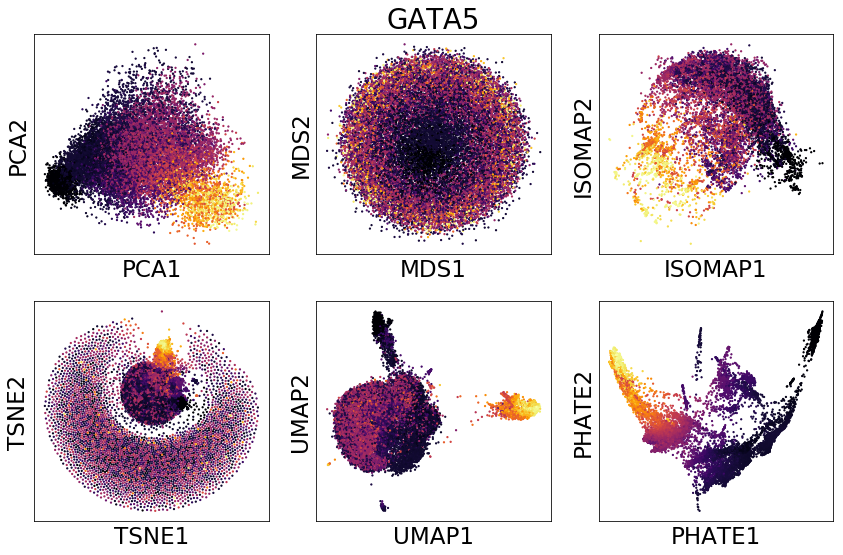

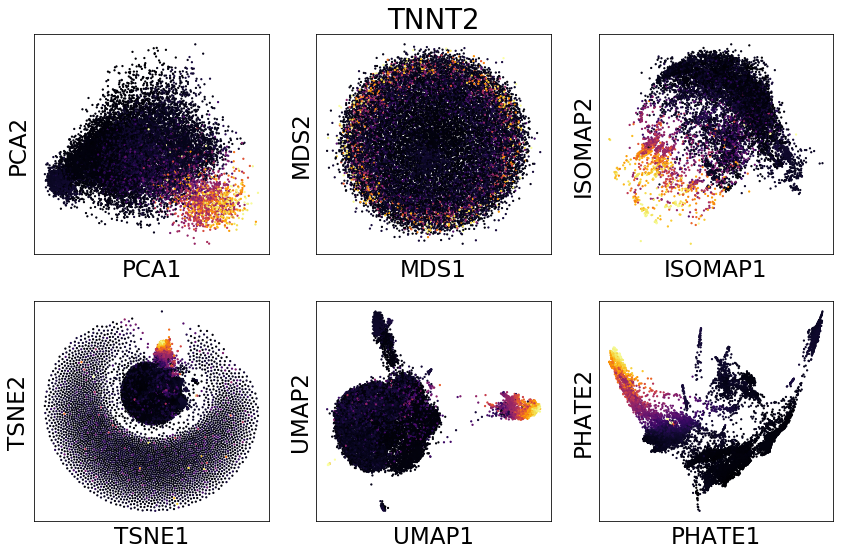

In [86]:
for gene in ['T', 'MYC', 'LEF1', 'GATA5', 'TNNT2', 'KLF5', 'CDX2', 'SOX15',
            'POU5F1', 'GBX2', 'SOX10']:

    fig, axes = plt.subplots(2,3, figsize=(12,8))
    axes = axes.flatten()
    
    exp = data_magic[gene]
    for alg, ax in zip(embeddings, axes):
        if alg == 'MDS':
            title=gene
        else:
            title=None
        if gene == 'TNNT2':
            vmax = 0.6
        else:
            vmax = None
        scprep.plot.scatter2d(embeddings[alg], c=exp, cmap='inferno',
                         ticks=False, label_prefix=alg, legend=False,
                          ax=ax, title=title, vmax=vmax)
    
    fig.tight_layout()
    fig.savefig('./img/EmbryoidBody.{}.png'.format(gene), dpi=300)